In [4]:
# Install required packages
!pip install leafmap osmnx==1.3.0 geopandas

# Import libraries
import osmnx as ox
import geopandas as gpd
import leafmap.foliumap as leafmap
from shapely.geometry import box


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.1/568.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.4/837.4 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.6 MB/s eta 0:00:00


In [5]:
from shapely.geometry import box

import math

center_lat = 31.5125
center_lon = 74.3185

buffer_km = 2  # 2 km buffer

buffer_lat = buffer_km / 111  # degrees latitude
buffer_lon = buffer_km / (111 * math.cos(math.radians(center_lat)))  # degrees longitude

west = center_lon - buffer_lon
east = center_lon + buffer_lon
south = center_lat - buffer_lat
north = center_lat + buffer_lat

from shapely.geometry import box
aoi_polygon = box(west, south, east, north)
print(aoi_polygon)



POLYGON ((74.33963485664212 31.49448198198198, 74.33963485664212 31.530518018018018, 74.29736514335788 31.530518018018018, 74.29736514335788 31.49448198198198, 74.33963485664212 31.49448198198198))


In [6]:
tags = {"building": True}
print("Downloading buildings from OSM...")
buildings = ox.geometries_from_polygon(aoi_polygon, tags)

# Filter only polygonal geometries
buildings = buildings[buildings.geometry.type.isin(["Polygon", "MultiPolygon"])]

# Convert to GeoDataFrame and ensure WGS84 CRS
buildings = buildings.set_crs("EPSG:4326")


In [7]:
import leafmap.foliumap as leafmap

m = leafmap.Map(center=[31.5204, 74.3587], zoom=15)

# Add multiple basemaps
m.add_basemap("Esri.WorldImagery")     # 🛰️ Satellite imagery
m.add_basemap("Google Hybrid")         # 🛰️ + Labels
m.add_basemap("CartoDB.Positron")      # 🗺️ Clean grayscale

# Add your building footprints
m.add_gdf(buildings, layer_name="OSM Buildings")

# Show map with layer control enabled
m


Basemap can only be one of the following: OpenStreetMap, ROADMAP, SATELLITE, TERRAIN, HYBRID, FWS NWI Wetlands, FWS NWI Wetlands Raster, NLCD 2021 CONUS Land Cover, NLCD 2019 CONUS Land Cover, NLCD 2016 CONUS Land Cover, NLCD 2013 CONUS Land Cover, NLCD 2011 CONUS Land Cover, NLCD 2008 CONUS Land Cover, NLCD 2006 CONUS Land Cover, NLCD 2004 CONUS Land Cover, NLCD 2001 CONUS Land Cover, USGS NAIP Imagery, USGS NAIP Imagery False Color, USGS NAIP Imagery NDVI, USGS Hydrography, USGS 3DEP Elevation, USGS 3DEP Elevation Index, ESA WorldCover 2020, ESA WorldCover 2020 S2 FCC, ESA WorldCover 2020 S2 TCC, ESA WorldCover 2021, ESA WorldCover 2021 S2 FCC, ESA WorldCover 2021 S2 TCC, USGS.Imagery, BaseMapDE.Color, BaseMapDE.Grey, BasemapAT.basemap, BasemapAT.grau, BasemapAT.highdpi, BasemapAT.orthofoto, BasemapAT.overlay, BasemapAT.surface, BasemapAT.terrain, CartoDB.DarkMatter, CartoDB.DarkMatterNoLabels, CartoDB.DarkMatterOnlyLabels, CartoDB.Positron, CartoDB.PositronNoLabels, CartoDB.Positron

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [25]:
# Project buildings to UTM CRS
buildings_proj = buildings.to_crs(buildings.estimate_utm_crs())

# Project AOI to same CRS
aoi_proj = aoi_gdf.to_crs(buildings_proj.crs)


NameError: name 'aoi_gdf' is not defined

In [26]:
buildings_proj["area_m2"] = buildings_proj.geometry.area


In [ ]:
aoi_area_m2 = aoi_proj.geometry.area.iloc[0]
aoi_area_km2 = aoi_area_m2 / 1e6


In [ ]:
total_buildings = len(buildings_proj)
total_area_m2 = buildings_proj["area_m2"].sum()
avg_area_m2 = buildings_proj["area_m2"].mean()
building_density = total_buildings / aoi_area_km2

print(f"AOI area: {aoi_area_km2:.4f} km²")
print(f"Total buildings: {total_buildings}")
print(f"Total built-up area: {total_area_m2 / 1e6:.4f} km²")
print(f"Average building size: {avg_area_m2:.2f} m²")
print(f"Building density: {building_density:.2f} buildings/km²")


In [9]:
# Project building geometries to a metric CRS (for accurate area & export)
buildings_proj = buildings.to_crs(buildings.estimate_utm_crs())


In [10]:
#Export as GeoJSON
buildings_proj.to_file("modeltown_buildings.geojson", driver="GeoJSON")


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [12]:
from google.colab import files
files.download("modeltown_buildings.geojson")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
!ls modeltown_buildings.*


modeltown_buildings.geojson


In [20]:
from google.colab import files

uploaded = files.upload()  # Upload your_aoi.geojson


Saving map (1).geojson to map (1).geojson


In [21]:
import geopandas as gpd

# Load your uploaded GeoJSON file
aoi = gpd.read_file("map (1).geojson")

# Ensure it's using WGS84 (required for OSM queries)
aoi = aoi.to_crs("EPSG:4326")

# Extract the geometry for query
aoi_polygon = aoi.geometry.iloc[0]


In [22]:
import osmnx as ox

# Define OSM filter for buildings
tags = {"building": True}

# Query buildings within the AOI polygon
buildings = ox.geometries_from_polygon(aoi_polygon, tags)

# Keep only Polygon or MultiPolygon geometries
buildings = buildings[buildings.geometry.type.isin(["Polygon", "MultiPolygon"])]


In [23]:
# Project both AOI and buildings to UTM (metric CRS)
buildings_proj = buildings.to_crs(buildings.estimate_utm_crs())
aoi_proj = aoi.to_crs(buildings_proj.crs)

# Calculate area of each building in m²
buildings_proj["area_m2"] = buildings_proj.area

# AOI area in km²
aoi_area_km2 = aoi_proj.geometry.area.iloc[0] / 1e6

# Building statistics
total_buildings = len(buildings_proj)
total_area_m2 = buildings_proj["area_m2"].sum()
avg_area_m2 = buildings_proj["area_m2"].mean()
building_density = total_buildings / aoi_area_km2

print(f"AOI Area: {aoi_area_km2:.4f} km²")
print(f"Total Buildings: {total_buildings}")
print(f"Total Built-up Area: {total_area_m2 / 1e6:.4f} km²")
print(f"Average Building Size: {avg_area_m2:.2f} m²")
print(f"Building Density: {building_density:.2f} buildings/km²")


AOI Area: 16.4258 km²
Total Buildings: 939
Total Built-up Area: 0.9792 km²
Average Building Size: 1042.83 m²
Building Density: 57.17 buildings/km²


In [24]:
import leafmap.foliumap as leafmap

m = leafmap.Map()
m.add_basemap("Esri.WorldImagery")  # 🛰 Satellite background
m.add_gdf(aoi_proj, layer_name="AOI Boundary")
m.add_gdf(buildings_proj, layer_name="OSM Buildings")
m


Basemap can only be one of the following: OpenStreetMap, ROADMAP, SATELLITE, TERRAIN, HYBRID, FWS NWI Wetlands, FWS NWI Wetlands Raster, NLCD 2021 CONUS Land Cover, NLCD 2019 CONUS Land Cover, NLCD 2016 CONUS Land Cover, NLCD 2013 CONUS Land Cover, NLCD 2011 CONUS Land Cover, NLCD 2008 CONUS Land Cover, NLCD 2006 CONUS Land Cover, NLCD 2004 CONUS Land Cover, NLCD 2001 CONUS Land Cover, USGS NAIP Imagery, USGS NAIP Imagery False Color, USGS NAIP Imagery NDVI, USGS Hydrography, USGS 3DEP Elevation, USGS 3DEP Elevation Index, ESA WorldCover 2020, ESA WorldCover 2020 S2 FCC, ESA WorldCover 2020 S2 TCC, ESA WorldCover 2021, ESA WorldCover 2021 S2 FCC, ESA WorldCover 2021 S2 TCC, USGS.Imagery, BaseMapDE.Color, BaseMapDE.Grey, BasemapAT.basemap, BasemapAT.grau, BasemapAT.highdpi, BasemapAT.orthofoto, BasemapAT.overlay, BasemapAT.surface, BasemapAT.terrain, CartoDB.DarkMatter, CartoDB.DarkMatterNoLabels, CartoDB.DarkMatterOnlyLabels, CartoDB.Positron, CartoDB.PositronNoLabels, CartoDB.Positron

<Axes: >

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


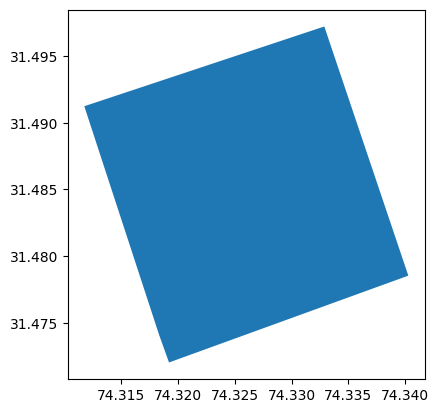

In [18]:
 aoi = gpd.read_file("map.geojson")
aoi = aoi.to_crs("EPSG:4326")
aoi.plot()


In [19]:
print("AOI bounds:", aoi.total_bounds)  # [minx, miny, maxx, maxy]
print("AOI area (deg²):", aoi.geometry.area.sum())


AOI bounds: [74.31177079 31.47201952 74.34027254 31.4972237 ]
AOI area (deg²): 0.0004466420050259381


/tmp/ipython-input-19-2949275304.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("AOI area (deg²):", aoi.geometry.area.sum())
